## **NA analysis in dataset for PM2.5**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Load the data
stations_data = pd.read_csv('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')

# We are only inerested in the IDStations, Time, and AQ_pm25
stations_data = stations_data[['IDStations', 'Time', 'AQ_pm25']]

# Cast PM25 to numeric
stations_data['AQ_pm25'] = pd.to_numeric(stations_data['AQ_pm25'], errors='coerce')

# Cast Time to datetime
stations_data['Time'] = pd.to_datetime(stations_data['Time'])

C:\Users\camil\AppData\Local\Temp\ipykernel_8020\66338916.py:2: DtypeWarning: Columns (0,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  stations_data = pd.read_csv('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')


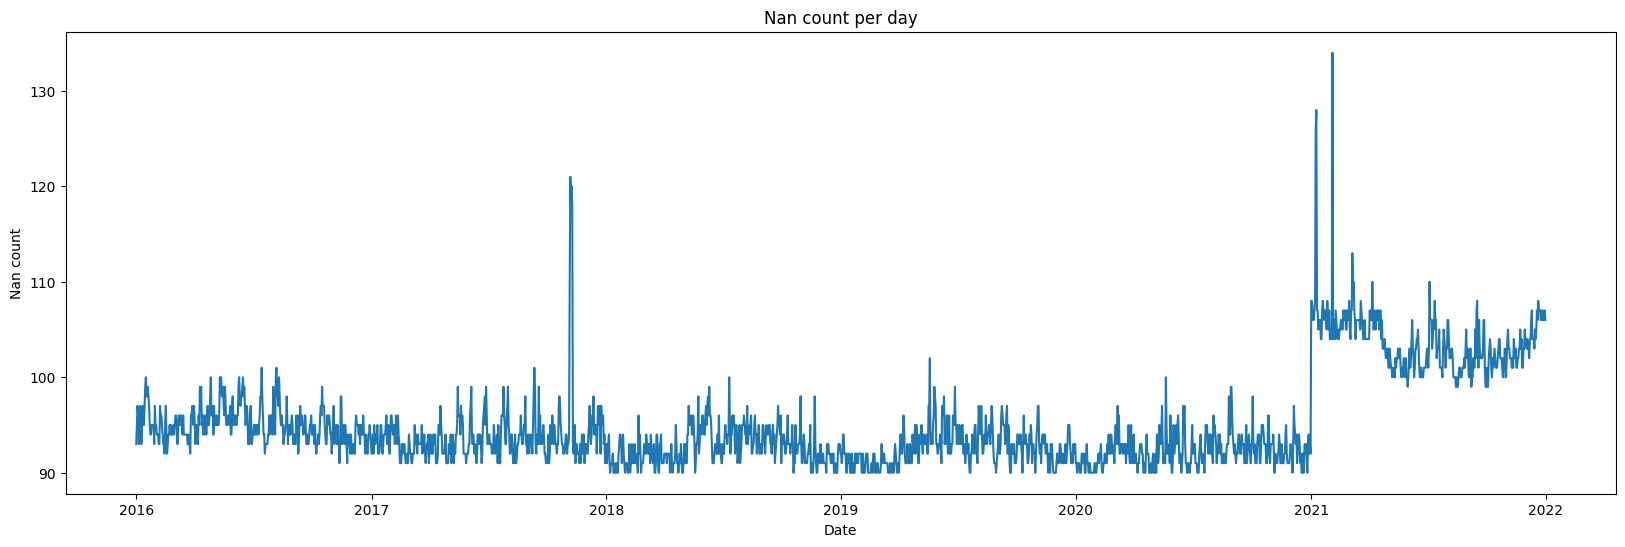

In [3]:
# Count the quantity of Nan in PM2.5 per day
nan_count = stations_data[stations_data['AQ_pm25'].isna()].groupby(stations_data['Time'].dt.date).size()

plt.figure(figsize=(20, 6))  # Set the figure size in inches (width, height)
plot = nan_count.plot()
plot.set_ylabel('Nan count')
plot.set_xlabel('Date')
plot.set_title('Nan count per day')
plt.show()

In [4]:
# Print what stations stop have NA in PM2.5 from the begginning of 2021 to the end of the dataset
df_2021_after = stations_data[stations_data['Time'] >= '2021-01-01']    
nan_count = df_2021_after[df_2021_after['AQ_pm25'].isna()].groupby('IDStations').size()
ordered_nan_count = nan_count.sort_values(ascending=False)
# Filter the ones that have more than 364 Nans
ordered_nan_count = ordered_nan_count[ordered_nan_count > 364]

# Set column names to dataframe
ordered_nan_count = ordered_nan_count.reset_index()
ordered_nan_count.columns = ['IDStations', 'Nan count']

# write in a csv the stations that have more than 364 Nans
ordered_nan_count.to_csv('../data/stations_with_more_than_364_nans.csv')

## **Where are those stations?**

In [5]:
map = gpd.read_file('../data/AgrImOnIA/raw/Comuni_correnti_poligonali.shp')
map = map.to_crs({'init': 'epsg:4326'})
map['NOME_COM'] = map['NOME_COM'].str.replace('`', "'")
map.head()

C:\Users\camil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,OBJECTID,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
0,58,2ec835aa-55fd-4157-a4ef-9762bf1c4eac,A533,03016017,AZZONE,16,BERGAMO,BG,ZO09,VALLE DI SCALVE,...,1980,16017,None,030325,ATS DI BERGAMO,None,None,1.731573e+07,22193.780488,"POLYGON ((10.11432 45.93747, 10.11393 45.93752..."
1,63,93c3bba6-7115-4e4e-8426-a8752b94d9ee,I894,03018152,SPESSA,18,PAVIA,PV,None,None,...,1980,18152,None,030328,ATS DI PAVIA,None,None,1.236544e+07,16260.447426,"POLYGON ((9.36064 45.13149, 9.36010 45.12986, ..."
2,70,ade53e93-78e7-4990-b979-88de73da9ea1,D660,03098026,FOMBIO,98,LODI,LO,None,None,...,1980,98026,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,None,None,7.456725e+06,19279.664351,"POLYGON ((9.70211 45.14260, 9.70212 45.14259, ..."
3,71,d2fa448d-1769-4d7e-8189-1e78981391f3,G388,03018110,PAVIA,18,PAVIA,PV,None,None,...,2012,18110,None,030328,ATS DI PAVIA,None,None,6.323801e+07,47660.027322,"POLYGON ((9.20950 45.22094, 9.20963 45.22098, ..."
4,72,6c49be44-c6c3-497f-8dcb-2f4b5c8f9753,L788,03018175,VERRUA PO,18,PAVIA,PV,None,None,...,1980,18175,None,030328,ATS DI PAVIA,None,None,1.083022e+07,18259.383988,"POLYGON ((9.16910 45.13717, 9.17490 45.13226, ..."


In [6]:
# load agrimonia dataset 
agrimonia_dataset = gpd.read_file('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')
agrimonia_dataset.head()

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,...,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,geometry
0,1264,46.1678524,9.87920992,2016-01-01,290,6.200e+01,5.300e+01,NaN,NaN,8.263e+01,...,3.906e-01,3.832e-01,5.892e+00,4.167e-01,6.467e+00,3.998e+00,1.234e+00,112,17,None
1,1264,46.1678524,9.87920992,2016-01-02,290,7.300e+01,6.300e+01,NaN,NaN,1.017e+02,...,3.911e-01,3.832e-01,5.892e+00,4.167e-01,6.463e+00,3.997e+00,1.234e+00,112,17,None
2,1264,46.1678524,9.87920992,2016-01-03,290,4.400e+01,3.900e+01,NaN,NaN,6.626e+01,...,3.916e-01,3.832e-01,5.892e+00,4.168e-01,6.458e+00,3.997e+00,1.234e+00,112,17,None
3,1264,46.1678524,9.87920992,2016-01-04,290,3.100e+01,2.900e+01,NaN,NaN,6.331e+01,...,3.923e-01,3.832e-01,5.892e+00,4.168e-01,6.454e+00,3.997e+00,1.234e+00,112,17,None
4,1264,46.1678524,9.87920992,2016-01-05,290,2.700e+01,2.600e+01,NaN,NaN,7.553e+01,...,3.931e-01,3.832e-01,5.892e+00,4.169e-01,6.450e+00,3.997e+00,1.233e+00,112,17,None


In [7]:
# aggregate stations
aggregation_funcs = {'Latitude': 'first', 'Longitude': 'first'}
stations = agrimonia_dataset.groupby('IDStations').agg(aggregation_funcs)

# Select the ones that have more than 364 Nans
stations_nan_2021 = stations[stations.index.isin(ordered_nan_count['IDStations'])]

In [8]:
# import Overpass API from OpenStreetMap
from OSMPythonTools.overpass import Overpass as ovp

In [9]:
def get_common_data(latitude, longitude):
    common_query = f'''
    is_in({latitude},{longitude});
    area._[admin_level="8"];
    out;
    '''

    region_query = f'''
    is_in({latitude},{longitude});
    area._[admin_level="4"];
    out;
    '''

    common_data = ovp().query(common_query)
    common_name = common_data.elements()[0].tags().get('name').upper() 

    region_data = ovp().query(region_query); 
    region_name = region_data.elements()[0].tags().get('name').upper()

    return common_name, region_name

In [10]:
stations_nan_2021_locations = [get_common_data(stations_nan_2021.iloc[i, 0], stations_nan_2021.iloc[i, 1]) for i in range(stations_nan_2021.shape[0])]
stations_nan_2021_locations

[('BORGO MANTOVANO', 'LOMBARDIA'),
 ('MORTARA', 'LOMBARDIA'),
 ('VIGEVANO', 'LOMBARDIA'),
 ('LUGANO', 'TICINO'),
 ('FERRARA', 'EMILIA-ROMAGNA'),
 ("LUGAGNANO VAL D'ARDA", 'EMILIA-ROMAGNA'),
 ('ROVERETO', 'TRENTINO-ALTO ADIGE/SÜDTIROL'),
 ('ALESSANDRIA', 'PIEMONTE'),
 ('MODENA', 'EMILIA-ROMAGNA'),
 ('RIVA DEL GARDA', 'TRENTINO-ALTO ADIGE/SÜDTIROL'),
 ('PARMA', 'EMILIA-ROMAGNA'),
 ('REGGIO EMILIA', 'EMILIA-ROMAGNA'),
 ('BUSALLA', 'LIGURIA'),
 ('PARMA', 'EMILIA-ROMAGNA'),
 ('CARPI', 'EMILIA-ROMAGNA'),
 ('VALLELAGHI', 'TRENTINO-ALTO ADIGE/SÜDTIROL'),
 ('VERONA', 'VENETO'),
 ('CERANO', 'PIEMONTE'),
 ('VERBANIA', 'PIEMONTE'),
 ('NOVARA', 'PIEMONTE'),
 ('BORGOSESIA', 'PIEMONTE'),
 ('VERCELLI', 'PIEMONTE'),
 ('LEGNAGO', 'VENETO'),
 ('CASALE MONFERRATO', 'PIEMONTE'),
 ('NOVARA', 'PIEMONTE'),
 ('BUSALLA', 'LIGURIA'),
 ('MODENA', 'EMILIA-ROMAGNA'),
 ('COLORNO', 'EMILIA-ROMAGNA'),
 ('GUASTALLA', 'EMILIA-ROMAGNA'),
 ('CENTO', 'EMILIA-ROMAGNA'),
 ('FERRARA', 'EMILIA-ROMAGNA'),
 ('MIRANDOLA', 'EMILIA

In [11]:
# associate common names and regions to stations 
stations_nan_2021['COM_NAME'], stations_nan_2021['REGION'] = zip(*stations_nan_2021_locations)
stations_nan_2021.to_csv("../data/stations_locations.csv")
stations_nan_2021

C:\Users\camil\AppData\Local\Temp\ipykernel_8020\2633917306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_nan_2021['COM_NAME'], stations_nan_2021['REGION'] = zip(*stations_nan_2021_locations)
C:\Users\camil\AppData\Local\Temp\ipykernel_8020\2633917306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_nan_2021['COM_NAME'], stations_nan_2021['REGION'] = zip(*stations_nan_2021_locations)


,Latitude,Longitude,COM_NAME,REGION
IDStations,,,,
702,45.0339428,11.11691811,BORGO MANTOVANO,LOMBARDIA
707,45.2547287,8.74415438,MORTARA,LOMBARDIA
709,45.3036079,8.84480461,VIGEVANO,LOMBARDIA
STA-CH0043A,46.0259000,8.96752000,LUGANO,TICINO
STA.IT0187A,44.8425000,11.61306000,FERRARA,EMILIA-ROMAGNA
STA.IT0544A,44.8238900,9.83028000,LUGAGNANO VAL D'ARDA,EMILIA-ROMAGNA
STA.IT0591A,45.8924400,11.03941000,ROVERETO,TRENTINO-ALTO ADIGE/SÜDTIROL
STA.IT0643A,44.9066000,8.61200000,ALESSANDRIA,PIEMONTE
STA.IT0721A,44.6360500,10.90473000,MODENA,EMILIA-ROMAGNA


C:\Users\camil\AppData\Local\Temp\ipykernel_8020\1451637853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_nan_2021['geometry'] = geometry


<Axes: >

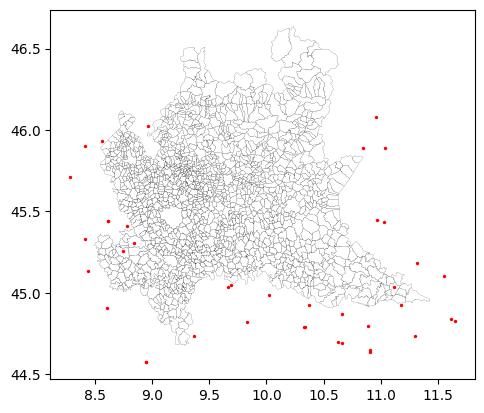

In [12]:
from shapely.geometry import Point

latitudes = stations_nan_2021['Latitude'].tolist()
longitudes = stations_nan_2021['Longitude'].tolist()
geometry = [Point(xy) for xy in zip(longitudes, latitudes)]

stations_nan_2021['geometry'] = geometry
stations_nan_2021_df = gpd.GeoDataFrame(geometry=geometry)
stations_nan_2021_df.crs = 'EPSG:4326'
stations_nan_2021_df = stations_nan_2021_df.to_crs(map.crs)

# show all stations_nan_2021
base = map.plot(color='white', edgecolor='black', linewidth=0.1)
stations_nan_2021_df.plot(ax=base, color='red', markersize=2)

# **Actually, which stations do record PM2.5?**

In [30]:
agrimonia_dataset = gpd.read_file('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')

# Make AQ_pm25 numeric
agrimonia_dataset['AQ_pm25'] = pd.to_numeric(agrimonia_dataset['AQ_pm25'], errors='coerce')

aggregation_funcs = {'Latitude': 'first', 'Longitude': 'first', 'AQ_pm25': 'mean'}
stations = agrimonia_dataset.groupby('IDStations').agg(aggregation_funcs)
stations

,Latitude,Longitude,AQ_pm25
IDStations,,,
1264,46.1678524,9.87920992,17.918957
1265,45.3027835,9.49527370,23.996223
1266,45.2334936,9.66625038,NaN
1269,45.6497025,9.60122334,24.934296
1274,46.0158283,9.28640921,NaN
...,...,...,...
STA.IT2102A,45.8988000,8.41570000,NaN
STA.IT2121A,45.6894000,8.45840000,15.599344
STA.IT2156A,44.7002780,10.62277800,NaN


In [33]:
# Filter stations with PM25
stations_with_pm25_2 = stations[stations['AQ_pm25'].notna()]
stations_with_pm25_2

,Latitude,Longitude,AQ_pm25
IDStations,,,
1264,46.1678524,9.87920992,17.918957
1265,45.3027835,9.49527370,23.996223
1269,45.6497025,9.60122334,24.934296
1297,45.1504689,9.93059647,27.796468
504,45.5347658,9.23610792,23.225000
548,45.4704990,9.19746036,24.299463
554,45.6273571,9.02640138,20.123033
560,45.8169732,8.82024071,19.303875
561,45.8150429,9.06697137,22.887452


<Axes: >

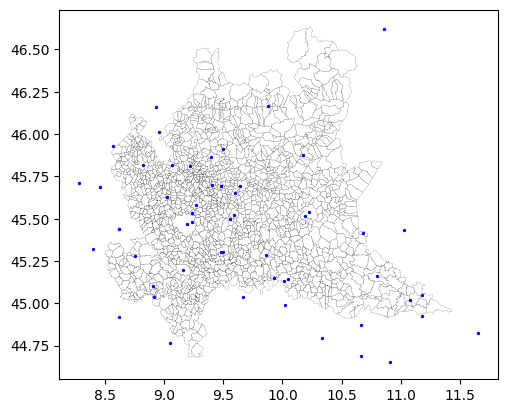

In [34]:
latitudes = stations_with_pm25_2['Latitude'].tolist()
longitudes = stations_with_pm25_2['Longitude'].tolist()
geometry = [Point(xy) for xy in zip(longitudes, latitudes)]

stations_with_pm25_2['geometry'] = geometry
stations_with_pm25_2_df = gpd.GeoDataFrame(geometry=geometry)
stations_with_pm25_2_df.crs = 'EPSG:4326'
stations_with_pm25_2_df = stations_with_pm25_2_df.to_crs(map.crs)

# show all stations_with_pm25_2
base = map.plot(color='white', edgecolor='black', linewidth=0.1)
stations_with_pm25_2_df.plot(ax=base, color='blue', markersize=2)
